In [107]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [108]:
# Importing dataset, creating dataframe df to view it
df = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/coding1_team-project/main/cardio_fitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


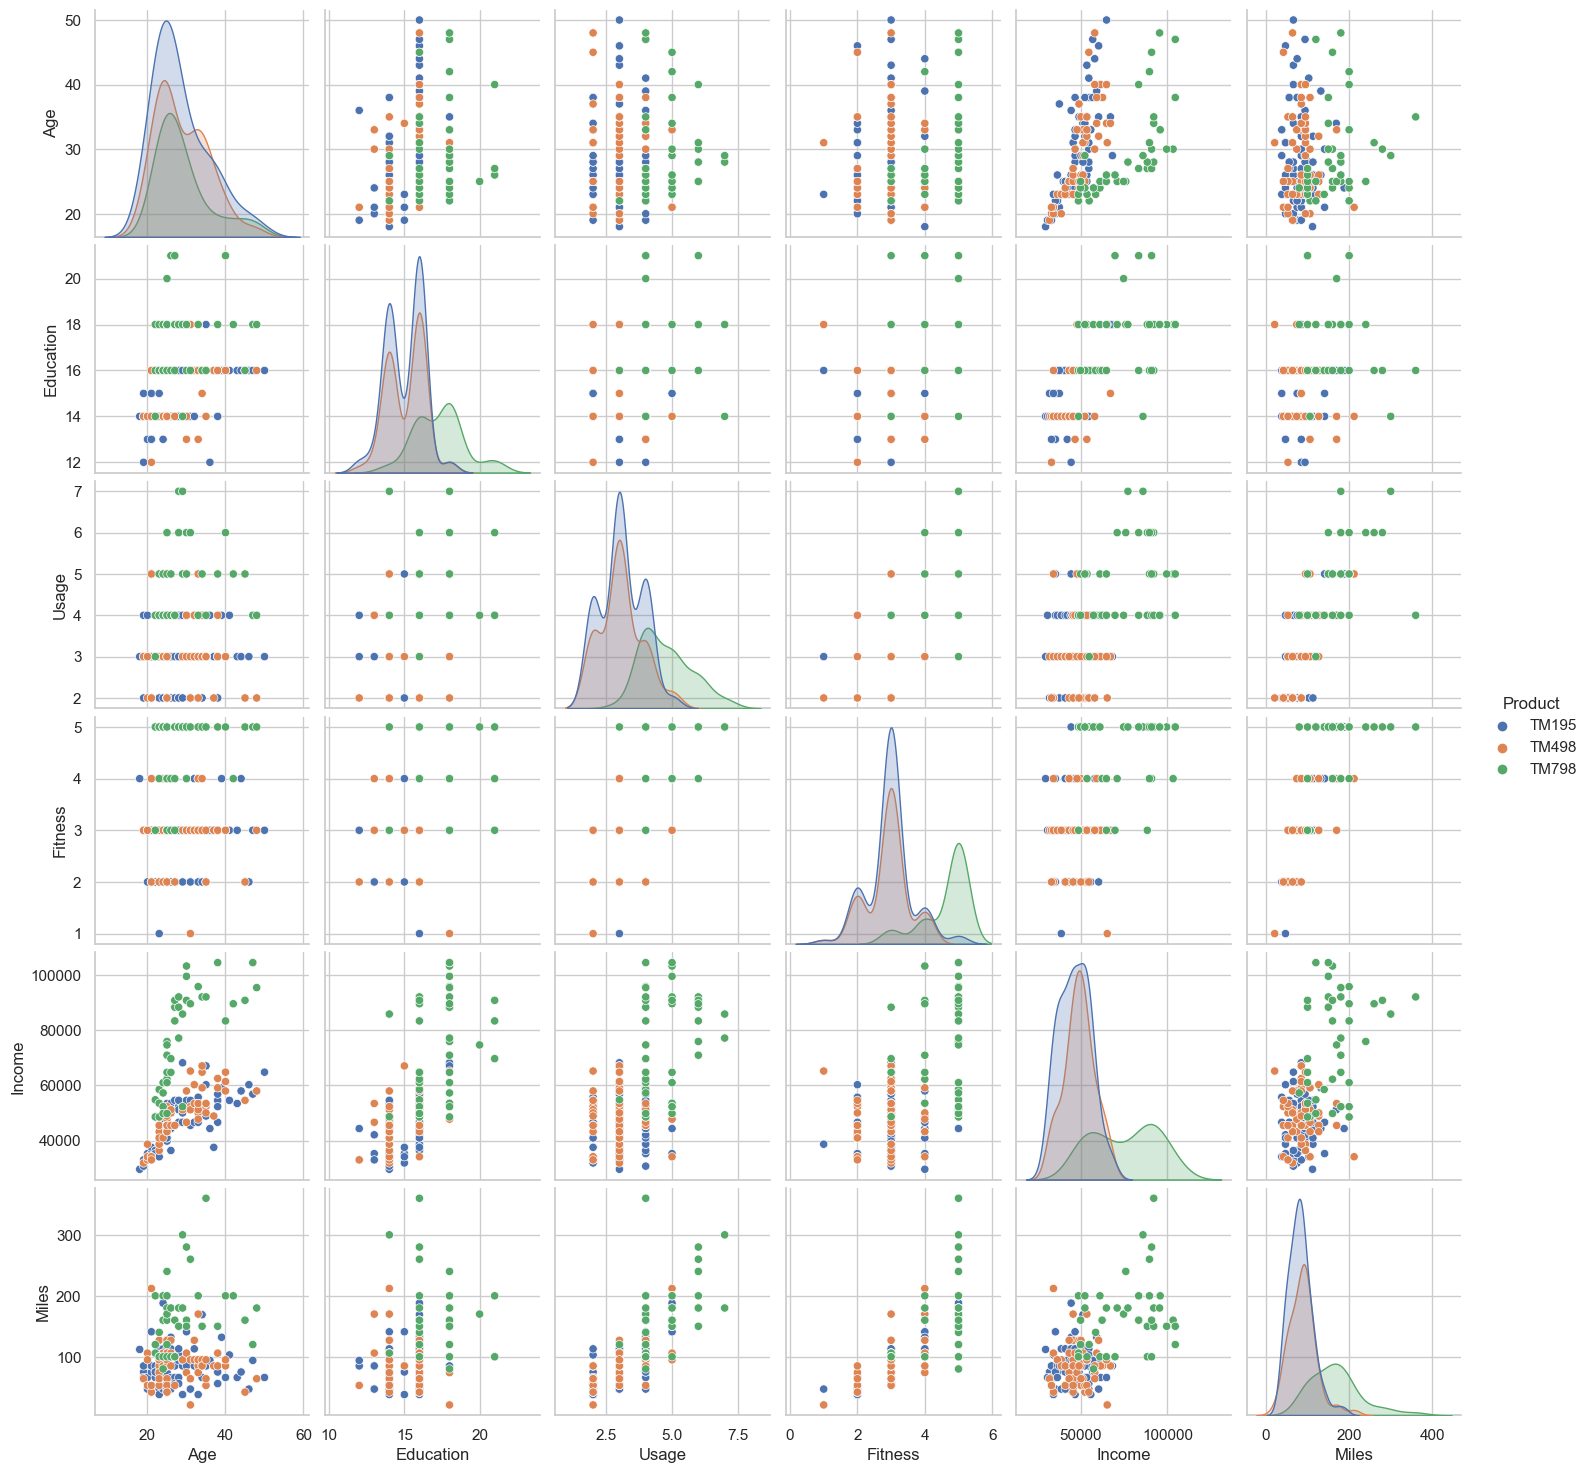

In [109]:
# create a pairplot to see customer profiles by product
sns.pairplot(df, hue='Product')
plt.show()

# Customer Profiles

![WhatsApp-kép, 2023-12-12, 12.50.49_74b91b0b.jpg](<attachment:WhatsApp-kép, 2023-12-12, 12.50.49_74b91b0b.jpg>)
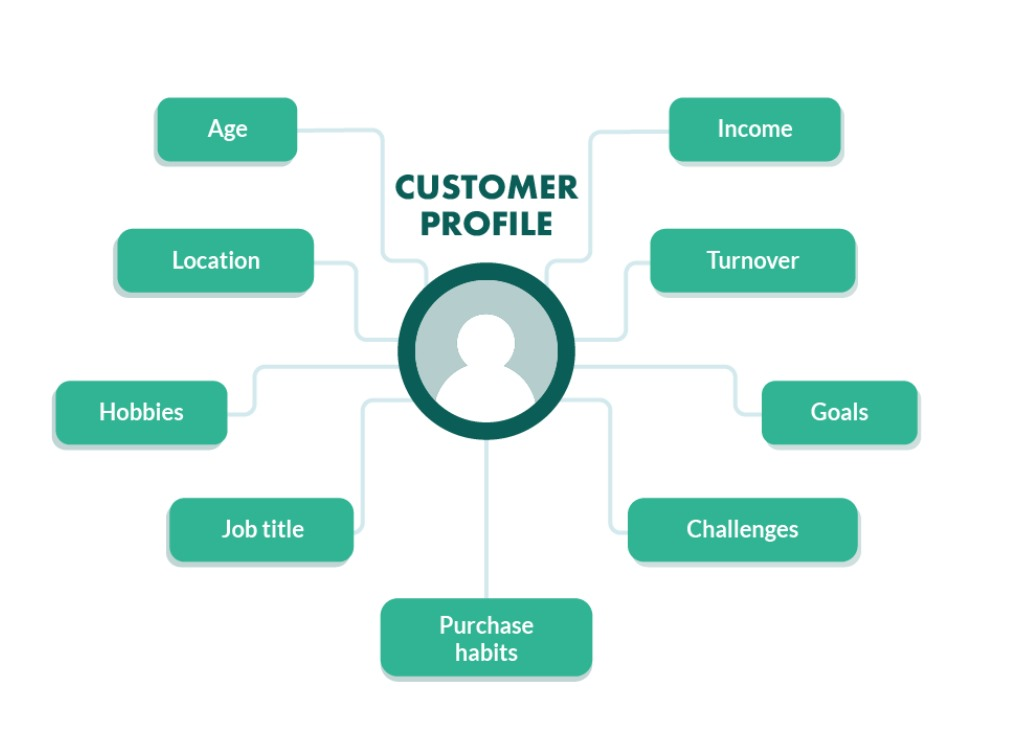

In [110]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [111]:
# Creating dummy variables and categorical variables for the dataset
 # create separate female column as when making a descpritive table it's better to show male and female separately
df['female'] = (df['Gender'] == 'Female').astype(int)
df['male'] = (df['Gender'] == 'Male').astype(int)

# create separate partnered and single column as when making a descpritive table it's better to show partnered and single separately
df['married'] = (df['MaritalStatus'] == 'Partnered').astype(int) 
df['single'] = (df['MaritalStatus'] == 'Single').astype(int)

# create high fitness level column based on fitness level
df['high_fitness'] = (df['Fitness'] >= 4).astype(int)

# define the age groups
df['age_group'] = df['Age'].apply(lambda x: '0-15' if x <= 15 else '16-30' if x <= 30 else '31-40' if x <= 40 else '41-50' if x <= 50 else '51-60' if x <= 60 else '61+')

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,female,male,married,single,high_fitness,age_group
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1,1,16-30
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1,0,16-30
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0,0,16-30
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1,0,16-30
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0,0,16-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,0,1,0,1,1,31-40
176,TM798,42,Male,18,Single,5,4,89641,200,0,1,0,1,1,41-50
177,TM798,45,Male,16,Single,5,5,90886,160,0,1,0,1,1,41-50
178,TM798,47,Male,18,Partnered,4,5,104581,120,0,1,1,0,1,41-50


In [112]:
# create value counts for each variable
for column in df[['Product','age_group','Gender','MaritalStatus','Education','Usage','Fitness','high_fitness']].columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print()
    print(f'There are {df[column].isnull().sum()} missing values')
    print('############################\n')

Product:
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

There are 0 missing values
############################

age_group:
16-30    120
31-40     48
41-50     12
Name: age_group, dtype: int64

There are 0 missing values
############################

Gender:
Male      104
Female     76
Name: Gender, dtype: int64

There are 0 missing values
############################

MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

There are 0 missing values
############################

Education:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

There are 0 missing values
############################

Usage:
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

There are 0 missing values
############################

Fitness:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

There are 0 missing values
############################

high_fitness:
0    125
1

In [113]:
# Descriptive Table
df[['Product','Age','Education','Usage','Fitness','Income','Miles','female','male','married','single','high_fitness']].groupby(['Product']).aggregate(['mean']).round(2)

,Age,Education,Usage,Fitness,Income,Miles,female,male,married,single,high_fitness
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Product,,,,,,,,,,,
TM195,28.55,15.04,3.09,2.96,46418.02,82.79,0.50,0.50,0.60,0.40,0.14
TM498,28.90,15.12,3.07,2.90,48973.65,87.93,0.48,0.52,0.60,0.40,0.13
TM798,29.10,17.32,4.78,4.62,75441.58,166.90,0.18,0.82,0.57,0.42,0.90


In [114]:
# Descriptive Table by age group
df[['Product','age_group','Age','Education','Usage','Fitness','Income','Miles','female','male','married','single','high_fitness']].groupby(['Product','age_group']).aggregate(['mean']).round(2)

Age Education Usage Fitness    Income   Miles female  \
                    mean      mean  mean    mean      mean    mean   mean   
Product age_group                                                           
TM195   16-30      24.44     14.85  3.11    2.95  43123.31   83.98   0.51   
        31-40      35.21     15.26  2.95    3.00  52302.00   81.74   0.47   
        41-50      45.17     16.00  3.33    3.00  57987.00   75.17   0.50   
TM498   16-30      24.11     14.54  3.11    2.91  43790.74   90.80   0.49   
        31-40      34.65     15.91  3.09    2.91  56225.22   86.61   0.52   
        41-50      46.50     16.00  2.00    2.50  56281.50   53.00   0.00   
TM798   16-30      25.70     17.27  4.77    4.53  69309.37  156.53   0.20   
        31-40      35.17     17.50  5.00    5.00  92961.00  220.00   0.17   
        41-50      45.50     17.50  4.50    4.75  95154.00  165.00   0.00   

                   male married single high_fitness  
                   mean    mean   mean         mean  
Product age_group                                    
TM195   16-30      0.49    0.58   0.42         0.13  
        31-40      0.53    0.58   0.42         0.16  
        41-50      0.50    0.83   0.17         0.17  
TM498   16-30      0.51    0.49   0.51         0.14  
        31-40      0.48    0.74   0.26         0.13  
        41-50      1.00    1.00   0.00         0.00  
TM798   16-30      0.80    0.57   0.43         0.87  
        31-40      0.83    0.67   0.33         1.00  
        41-50      1.00    0.50   0.50         1.00

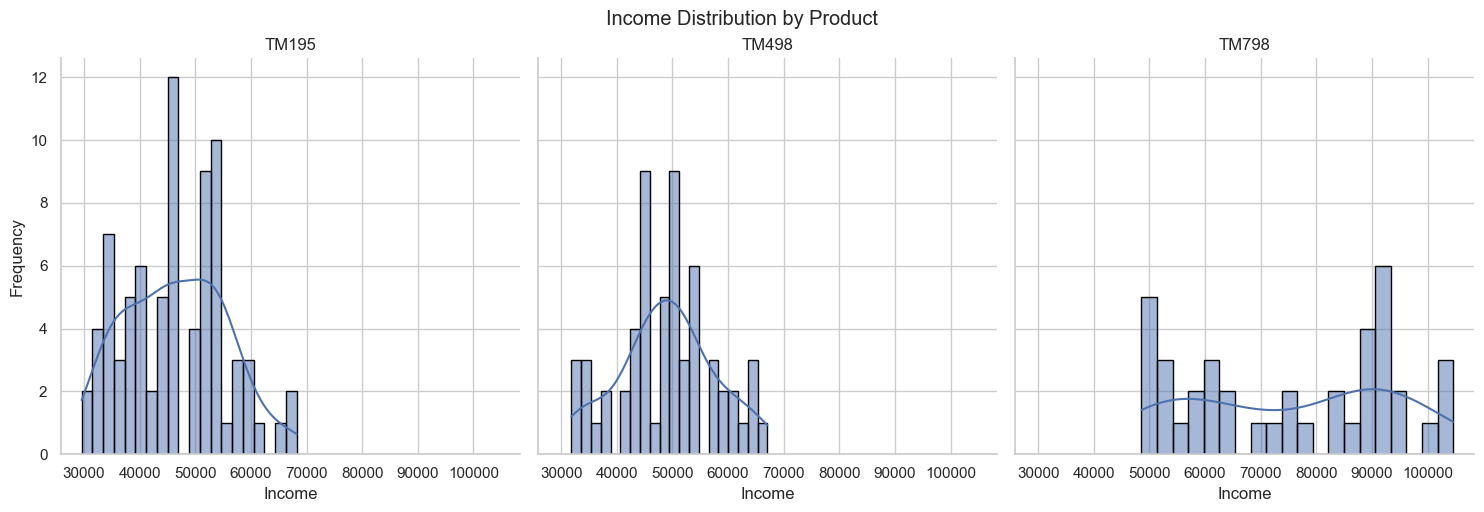

In [115]:
# Create distribution plots for each product by income group
sns.set(style="whitegrid")
# set facets to be by product, wrap after 3 plots, set plot size and margins
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=5, margin_titles=True)
g.map(sns.histplot, 'Income', bins=20, kde=True, edgecolor='black')
# set axis labels and title
g.set_axis_labels('Income', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Income Distribution by Product', y=1.02)

plt.show()


From this we can see that TM798 is pruchased mostly by people with higher income, while the other two are purchased by people with lower income. TM195 has the largest comsumer base overall whereas TM498 appears more niche.

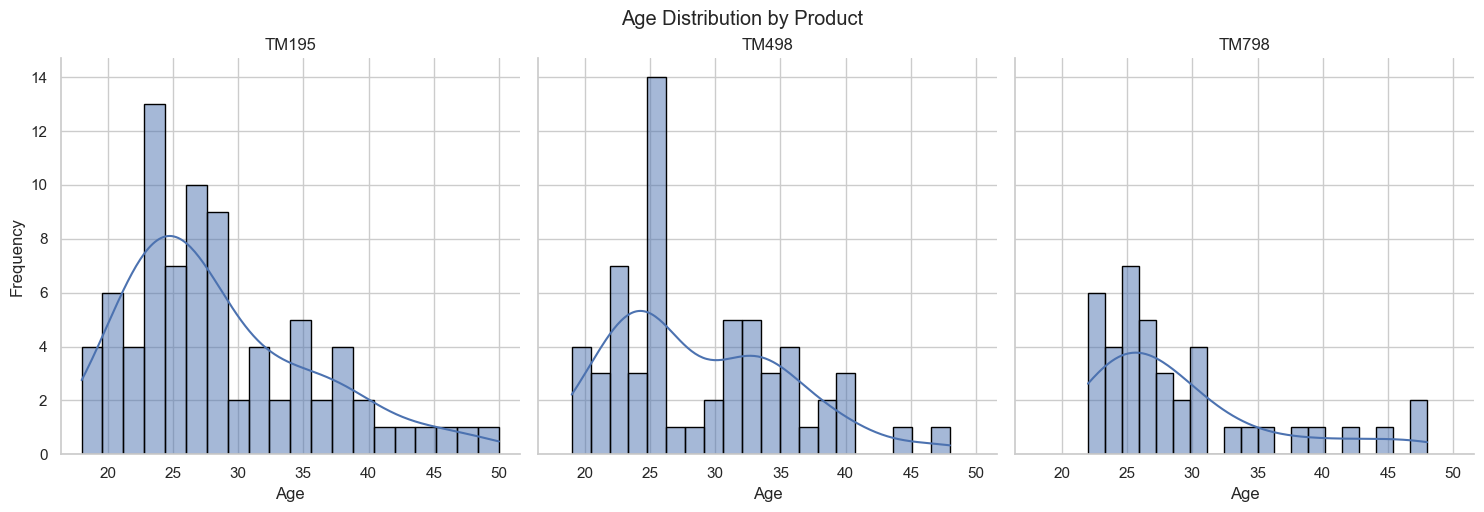

In [116]:
# Create distribution plots for each product by age
sns.set(style="whitegrid")
# set facets to be by product, wrap after 3 plots, set plot size and margins
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=5, margin_titles=True)
g.map(sns.histplot, 'Age', bins=20, kde=True, edgecolor='black')
# set axis labels and title
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Age Distribution by Product', y=1.02)

plt.show()

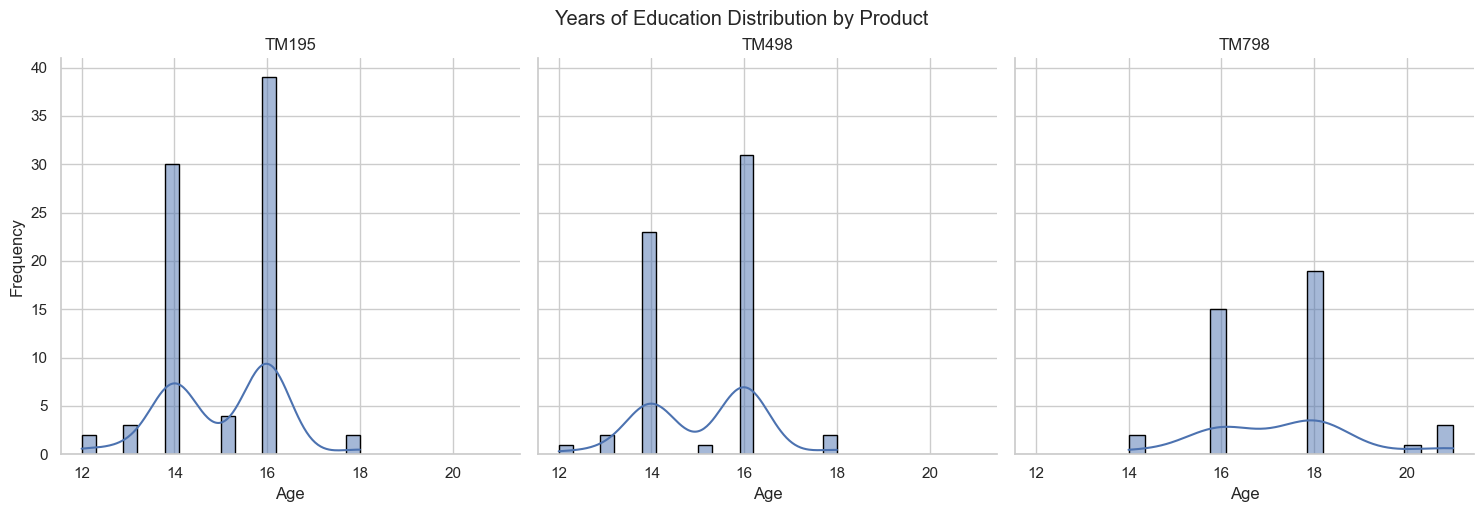

In [117]:
# Create distribution plots for each product by age
sns.set(style="whitegrid")
# set facets to be by product, wrap after 3 plots, set plot size and margins
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=5, margin_titles=True)
g.map(sns.histplot, 'Education', bins=20, kde=True, edgecolor='black')
# set axis labels and title
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Years of Education Distribution by Product', y=1.02)

plt.show()

In [118]:
# Grouping by product and gender and counting the number of occurrences
gender_counts = df.groupby(['Product', 'Gender']).count()['Age'].reset_index() # Here age doesn't matter, we are just counting the occurences

# Creating pie charts for each product
pie1 = px.pie(gender_counts, values='Age', names='Gender', title='Gender Distribution by Product', facet_col='Product',
             color='Gender', hole=0.3, labels={'Age': 'Count'},
             color_discrete_map={'Male': 'darkblue', 'Female': 'lightcoral'}  # Custom color map
             )

# Adding product information to the pie charts
pie1.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.05])  # Adjust pull for better visibility

# Updating layout for better appearance
pie1.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),  # Adjust margins
    showlegend=False,  # Hide legend
    title_x = 0.5,  # Center title
    height=400  # Set height for better aspect ratio
)


pie1.show()

In [119]:
# Grouping by product and gender and counting the number of occurrences
marital_df = df[['Product','single']].value_counts().reset_index().rename(columns={0:'count'})
marital_df['single'] = marital_df['single'].apply(lambda x: 'Single' if x == 1 else 'Married')

# Creating pie charts for each product
pie2 = px.pie(marital_df, values='count', names='single', title='Marital Status Distribution by Product', facet_col='Product',
             color='single', hole=0.3, labels={'Age': 'Count'},
             color_discrete_map={'Male': 'darkblue', 'Female': 'lightcoral'}  # Custom color map
             )

# Adding product information to the pie charts
pie2.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.05])  # Adjust pull for better visibility

# Updating layout for better appearance
pie2.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),  # Adjust margins
    showlegend=False,  # Hide legend
    title_x = 0.5,  # Center title
    height=400  # Set height for better aspect ratio
)

pie2.show()

In [120]:
# Grouping by product and gender and counting the number of occurrences
high_fitness_df = df[['Product','high_fitness']].value_counts().reset_index().rename(columns={0:'count'})
high_fitness_df['high_fitness'] = high_fitness_df['high_fitness'].apply(lambda x: 'High Fitness' if x == 1 else 'No High Fitness')

# Creating pie charts for each product
pie2 = px.pie(high_fitness_df, values='count', names='high_fitness', title='High Fitness Level Distribution by Product', facet_col='Product',
             color='high_fitness', hole=0.3, labels={'Age': 'Count'},
             color_discrete_map={'High Fitness': 'teal', 'No High Fitness': 'grey'}  # Custom color map
             )

# Adding product information to the pie charts
pie2.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.05])  # Adjust pull for better visibility

# Updating layout for better appearance
pie2.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),  # Adjust margins
    showlegend=False,  # Hide legend
    title_x = 0.5,  # Center title
    height=400  # Set height for better aspect ratio
)

pie2.show()

In [121]:
# Creating a histogram of fitness levels per product

fitness_graph = px.histogram(df, x='Fitness', color='Product', barmode='group', text_auto=True, height=500)

# customize layout
fitness_graph.update_layout(title='Fitness Levels per Product', title_x=.5) # Setting and centering title
fitness_graph.update_layout(template='simple_white', yaxis_title=None, showlegend=True) # Removing y axis title and legend
fitness_graph.update_xaxes(title='') # Removing x axis label
fitness_graph.update_yaxes(visible=False) # Removing y axis
fitness_graph.update_traces(textposition = 'outside') # Setting value labels outside each bar

fitness_graph.show()

With this distribution we can see that more niche, TM798 (green) has a much higher usage rate amongst fitness fanatics and is likely the higher end product in the fitness world compared to the other two.

TM195 and TM498 are comparable in this respect.

In [122]:
# Creating a histogram of fitness levels per product

fitness_graph = px.histogram(df, x='Usage', color='Product', barmode='group', text_auto=True, height=500)

# Updating layout
fitness_graph.update_layout(title='Usage Levels per Product', title_x=.5) # Setting and centering title
fitness_graph.update_layout(template='simple_white', yaxis_title=None, showlegend=True) # Removing y axis title and legend
fitness_graph.update_xaxes(title='') # Removing x axis label
fitness_graph.update_yaxes(visible=False) # Removing y axis
fitness_graph.update_traces(textposition = 'outside') # Setting value labels outside each bar

fitness_graph.show()

## Findings:

### TM195:
- **Age:**

   Customers on average are 28.6 years old
   From the age distribution graph it's seen that it mainly attracts people around 25 and is less popular above 40

- **Income:**

   ustomers earn on average 46.4k dollars
   Customers earn between 30k and 70k but mostly between 30k and 55k

- **Education:**

   Customers on average have 15 years of education
   Distribution is among people with 14 and 16

- **Gender:**

   Gender Distribution is 50-50

- **Marital Status:**

   40% of customers is single, 60% is married

- **Fitness Levels:**

   Customers on average have a fitness level of 2.96.
   14% of customers consider themselves to have high fitness level
   fitness level is almost only 3

- **Usage level:**

   Usage level is on average 3.07
   usage level is mainly 1,2,3 no high usage levels

- **Miles:**

   Customers plan to use this product on average for 82.8 miles

### TM498: 
- **Age:**

   Customers on average are 28.9 years old
   rom the age distribution graph it's seen that it mainly attracts people around 25 (way more than TM195) and is less popular above 40

- **Income:**

   Customers earn on average 48.9k dollars
   Customers earn between 30k and 70k but mostly between 40k and 55k

- **Education:**

   Customers on average have 15.1 years of education
   Distribution is among people with 14 and 16

- **Gender:**

   Gender Distribution is 48.3% Females and 51.7% Males
   in age group 41-50 there's only males

- **Marital Status:**

   40% of customers is single, 60% is married

- **Fitness Levels:**

   Customers on average have a fitness level of 2.9.
   13% of customers consider themselves to have high fitness level
   most customers have fitness level of 3

- **Usage level:**

   Usage level is on average 3.07
   Usage level is mainly 1,2 or 3 no high usage levels

- **Miles:**

   Customers plan to use this product on average for 87.93 miles

### TM798:
- **Age:**

   Customers on average are 29.1 years old
   From the age distribution graph it's visible that it is not that popular as the other 2 products,but there are still customers in each age group


- **Income:**

   Customers earn on average 75.4k dollars
   Customers earn between 50k and 100k with smaller groups around 50k and 90k

- **Education:**

   Customers on average have 17.3 years of education
   Distribution is among people with 16 and 18

- **Gender:**

   Gender Distribution is 17.5% Females and 82.5% Males

   in age group 41-50 there's only males

- **Marital Status:**

   42.5% of customers is single, 57.5% is married

- **Fitness Levels:**

   Customers on average have a fitness level of 4.62.
   90% of customers consider themselves to have high fitness level

- **Usage level:**

   Usage level is on average 4.78
   usage level is 4 and above

- **Miles:**

   Customers plan to use this product on average for 166.9 miles

## Summary:

Product TM195 and TM498 is almost the same regarding their customer profiles, which is also seen from the correlation matrix, most of their values are in the same region.

However Product TM798 is much more different then the other 2. Higher income group, mostly only males, higher fitness levels with higher usage and miles. 